# Project: Investigate a Dataset - TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

**J'ai choisi le dataset TMDb Movies, il contient des informations sur plus de 10 000 films collectés à partir de The Movie Database (TMDb), incluant aussi la note des utilisateurs et le revenu**

On peut distinguer entre autres :
<ul>
    <li><b>id</b> - qui correspond à l'id du film</li>
    <li><b>imdb_id</b> - qui correspond à l'id du film dans la base de données de TMDb</li>
    <li><b>popularity</b> - qui correspond à la popularité du film</li>
    <li><b>budget</b> - qui correspond au budget pour réaliser le film</li>
    <li><b>revenue</b> - qui correspond aux revenus du film</li>
    <li><b>original_title</b> - qui correspond au titre du film</li>
    <li><b>release_date</b> - qui correspond à la date de sortie du film</li>
    <li><b>vote_average</b> - qui correspond à la note moyenne du film</li>
</ul>

### Question(s) for Analysis

<ol>
    <strong>
        <li>Quelle est l'évolution des films en fonction de l'année ?</li>
        <li>Quelles sont les relations entre la popularité, le revenu et le score d'un film ?</li>
        <li>Quels sont les films ayant le plus de bénéfices ?</li>
    </strong>
</ol>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Après verifier le .info(), on constate que le type de "release_date" est object au lieu de datetime, convertissons le

In [5]:
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

In [6]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       


### Data Cleaning

 

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


Cherchons s'il y'a des champs vides

In [8]:
movie_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Nous constatons qu'il y'a plusieurs champs vides, verifions s'il faut utiliser un "dropna()" ou un "fillna()" pour bien nettoyer notre dataset

In [9]:
lignes = movie_df.dropna().shape[0]
cols = movie_df.dropna().shape[1]

print('Après avoir effectué un "dropna()", notre dataset a {} lignes et {} colonnes'.format(lignes, cols))

Après avoir effectué un "dropna()", notre dataset a 1992 lignes et 21 colonnes


In [10]:
lignes_2 = movie_df.fillna(0).shape[0]
cols_2 = movie_df.fillna(0).shape[1]

print('Après avoir effectué un "fillna(0)" pour remplacer les champs vides par la valeur 0, notre dataset a {} lignes et {} colonnes'.format(lignes_2, cols_2))

Après avoir effectué un "fillna(0)" pour remplacer les champs vides par la valeur 0, notre dataset a 10866 lignes et 21 colonnes


On constate qu'il est mieux pour nous de remplacer les valeurs vides par 0, dans la suite de notre analyse on supprimera les colonnes qui nous sont inutiles

In [11]:
movie_df = movie_df.fillna(0)

Cherchons maintenant s'il existe des lignes dupliquées

In [12]:
movie_df.duplicated().sum()

1

In [13]:
movie_df.drop_duplicates(inplace=True)

In [14]:
movie_df.duplicated().sum()

0

Supprimons maintenant les colonnes dont on a pas besoin

In [15]:
movie_df.drop(['imdb_id', 'homepage', 'tagline', 'overview'], axis=1,inplace=True)

In [16]:
movie_df.shape

(10865, 17)

<a id='eda'></a>
## Exploratory Data Analysis


Nous allons créer une fonction qui déssinera nos différents graphiques

In [17]:
def graph(df, x, y, k, size, title, xlabel, ylabel):
    df.plot(x=x, y=y, kind=k, figsize=size)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### Research Question 1 (Quelle est l'évolution des films en fonction de l'année ?)

Pour pouvoir repondre à cette question, il nous faut connaitre le nombre de films sorti par année, on va compter les différents "id" 

In [18]:
movie_per_year = movie_df.groupby('release_year').id.count()
movie_per_year.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

Transformons maintenant "movie_per_year" en DataFrame 

In [19]:
movie_per_year = pd.DataFrame(movie_per_year)
movie_per_year.reset_index(inplace=True)
#Renommons 'id' en 'number_of_movies' pour une bonne comprehension du graphique
movie_per_year.rename(columns={'id':'number_of_movies'}, inplace=True)
movie_per_year.head()

,release_year,number_of_movies
0,1960,32
1,1961,31
2,1962,32
3,1963,34
4,1964,42


Affichons maintenant le graphique

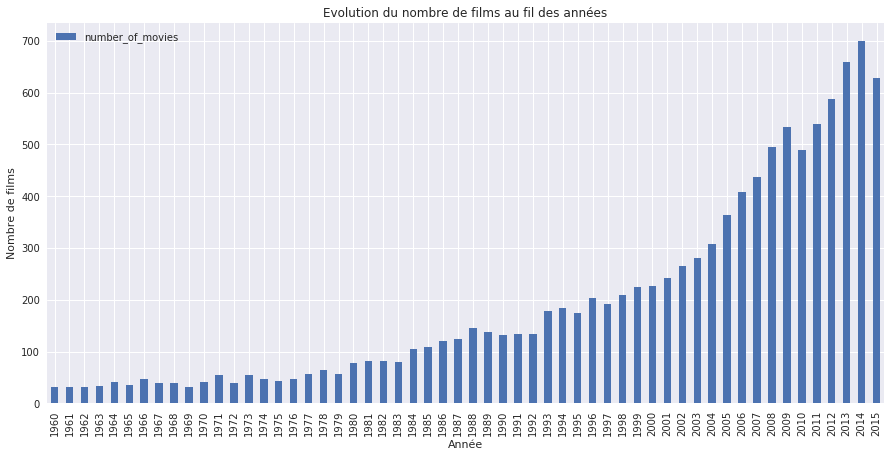

In [20]:
graph(movie_per_year, 'release_year', 'number_of_movies','bar', (15,7),'Evolution du nombre de films au fil des années','Année','Nombre de films')

Nous pouvons constater l'évolution de sortie de films par année

### Research Question 2  (Quelles sont les relations entre la popularité, le revenu et le score d'un film ?)

Ici on vas voir les relations qu'il y'a entre la popularité, le revenu et le score d'un film

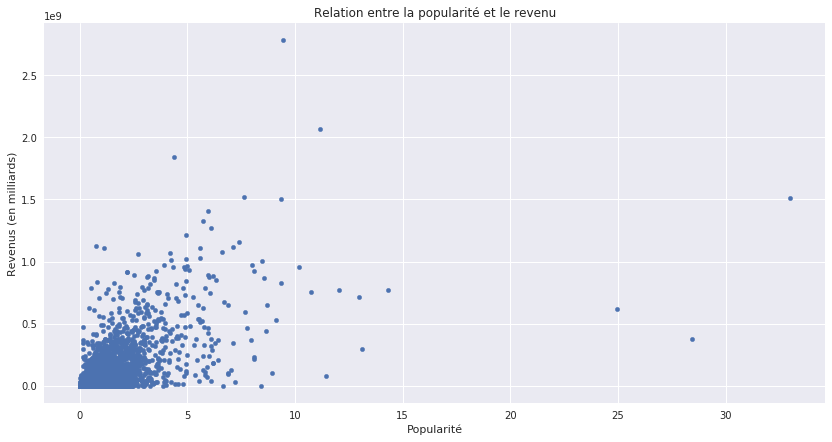

In [21]:
graph(movie_df, 'popularity', 'revenue', 'scatter', (14,7), 'Relation entre la popularité et le revenu', 'Popularité', 'Revenus (en milliards)')

La relation entre la popularité d'un film et ses revenus est croissante mais assez timide

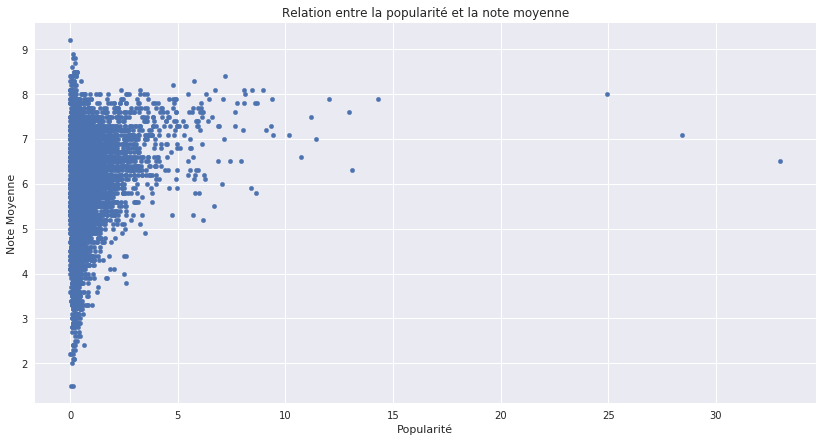

In [22]:
graph(movie_df, 'popularity', 'vote_average', 'scatter', (14,7), 'Relation entre la popularité et la note moyenne', 'Popularité', 'Note Moyenne')

On peut constater ici que la popularité d'un film n'influence pas beaucoup sa note moyenne

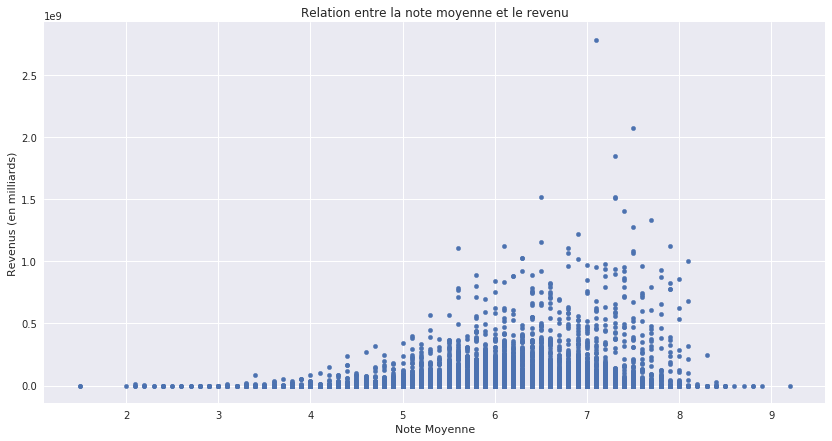

In [23]:
graph(movie_df, 'vote_average', 'revenue', 'scatter', (14,7), 'Relation entre la note moyenne et le revenu', 'Note Moyenne', 'Revenus (en milliards)')

Et ici le graphique nous montre une tendance croissante du revenu en fonction de la note moyenne

### Research Question 3  (Quels sont les films ayant le plus de bénéfices ?)

In [24]:
movie_profit = movie_df[['original_title', 'budget', 'revenue']]

Nous allons maintenant faire la soustraction des valeurs de la colonne "revenue" avec les valeurs de la colonne "budget", que nous allons mettre dans une nouvelle colonne "profit" qui sera utile pour la suite de notre analyse

In [25]:
#Lien : https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None
movie_profit['profit'] = movie_profit['revenue'] - movie_profit['budget']
movie_profit.head()

,original_title,budget,revenue,profit
0,Jurassic World,150000000,1513528810,1363528810
1,Mad Max: Fury Road,150000000,378436354,228436354
2,Insurgent,110000000,295238201,185238201
3,Star Wars: The Force Awakens,200000000,2068178225,1868178225
4,Furious 7,190000000,1506249360,1316249360


Nous allons maintenant classer notre nouveau dataset en fonction de "profit" par ordre décroissant et nous allons sélectionner les 5 premiers

In [26]:
movie_profit = movie_profit.sort_values('profit', ascending=False).iloc[:5]

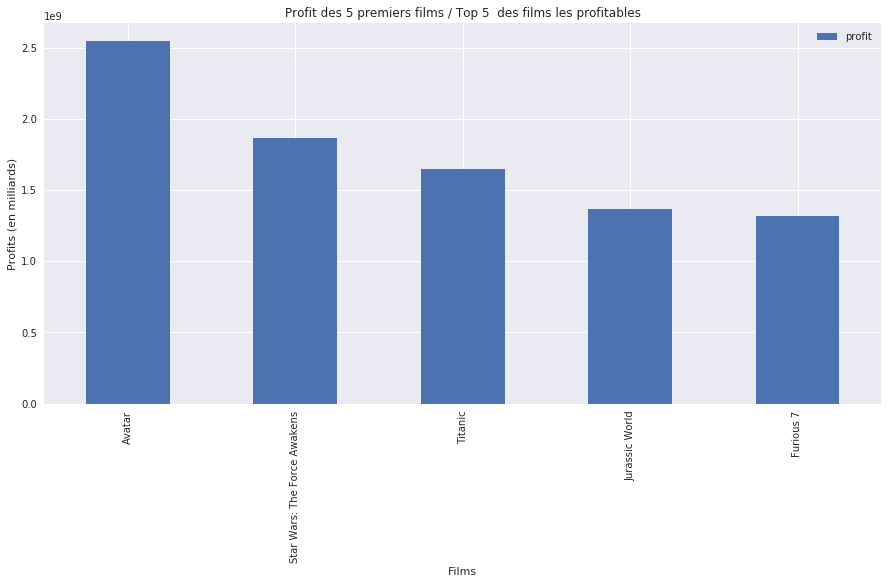

In [27]:
graph(movie_profit, 'original_title', 'profit', 'bar', (15,7), 'Profit des 5 premiers films / Top 5  des films les profitables', 'Films', 'Profits (en milliards)')

Et voici le classement des 5 films ayant fait le plus de bénéfices

<a id='conclusions'></a>
## Conclusions


1. Quelle est l'évolution des films en fonction de l'année ? -- **L'évolution des films en fonction des années est croissante et nous pouvons constater qu'en 2014, jusqu'à 700 films sont sortis alors qu'en 1960 nous étions à 31**
2. Quelles sont les relations entre la popularité, le revenu et le score d'un film ? -- **D'après nos 3 diagrammes on constate que les films les plus populaires ont tendance à être mieux noté et ayant le plus de revenus**
3. Quels sont les films ayant le plus de bénéfices ? -- **Comme on peux le voir, "Avatar" est le film ayant fait le plus de bénéfices, suivi respectivemment de "Star Wars : The Force Awakens" et de "Titanic"**

## Limitations

**Dans ce dataset, nous avons retrouvé des revenus vides ou nul. Aussi plein d'autres données manquantes qui rendraient notre dataset peu fourni si nous voulions supprimer ces champs. Nous n'avions aucune informations sur le profit réel ded chaque film.**



In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0